In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For Data Model Development
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score

In [2]:
#Loading the dataset
data=pd.read_csv("C:/Users/91888/Videos/train.csv")
test=pd.read_csv("C:/Users/91888/Videos/test.csv")

In [3]:
data.head(7)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
5,6,Male,Rural,High School,More than 10L,1,1,0,1,C,Gold,348768
6,7,Female,Rural,Bachelor,5L-10L,1,6,0,More than 1,A,Gold,238920


In [4]:
data.shape

(89392, 12)

In [5]:
# Rows = 89392
# columns = 12

In [6]:
data.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [8]:
print(data.isnull().sum())

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64


In [9]:
#There is no null values are present.

In [10]:
s = data.duplicated()
s.value_counts()

False    89392
Name: count, dtype: int64

In [11]:
#We don't have any duplicate values

<h2>Univariate Analysis</h2>

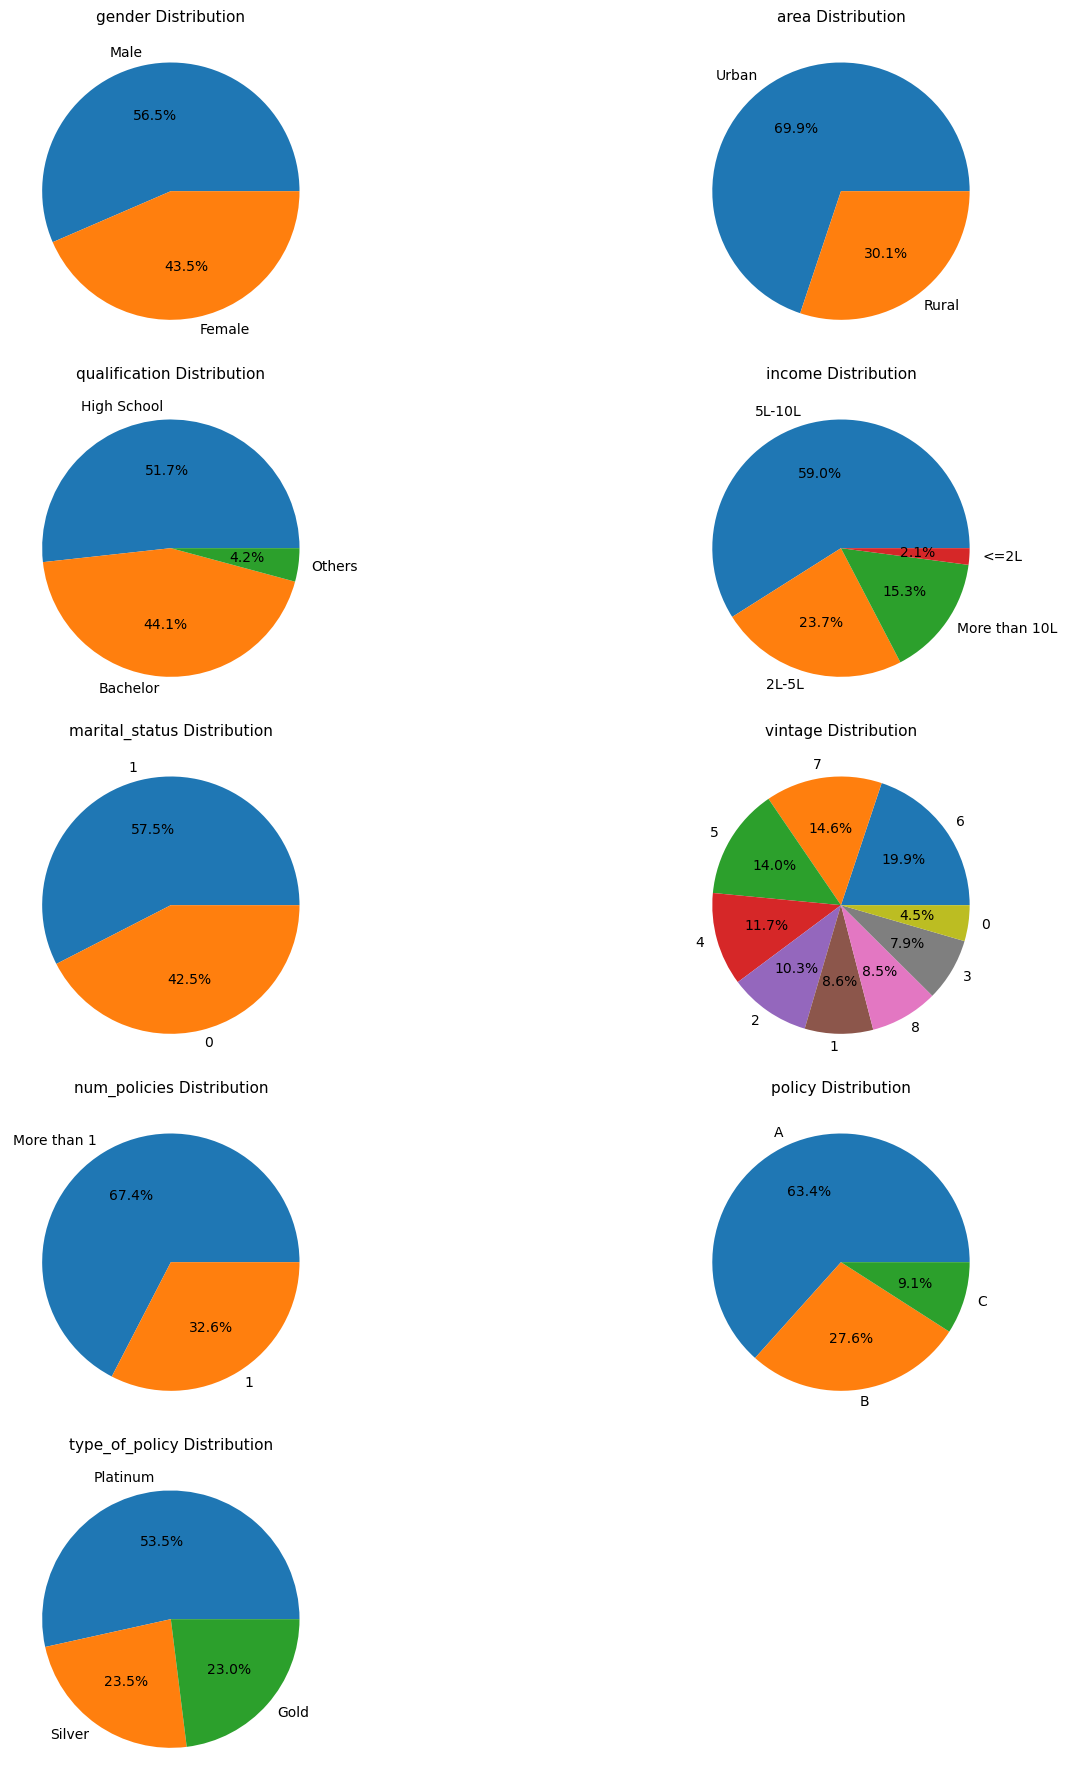

In [12]:
cols = ['gender', 'area', 'qualification', 'income','marital_status', 'vintage', 'num_policies', 'policy', 'type_of_policy']

fig, a = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))
a = a.flatten() 
for i, col in enumerate(cols):
    a[i].pie(data[col].value_counts().values, labels=data[col].value_counts().index , autopct='%1.1f%%')
    a[i].set_title(f"{col} Distribution", fontsize=11)
    
for j in range(i+1, len(a)):
    fig.delaxes(a[j])

plt.tight_layout()
plt.show()


In [14]:
#Insights from Univariate analysis are as follows:
#1.Gender: approximately 57% of the customers are male and 43% of them are female.
#2.Area: approximately 70% of the customers lives in urban area which is comapritively higher than rural area.
#3.qualification: High school is the high no. of qualification and there is not much difference in bachelors and high school.
#4.income: customers having income between 5l-10L are aprroximately 60%. 
#5.marital_status: approximately 58% of the customers are marraied and which is comapritively higher than non married customers.
#6.vintage: 0 is the lowest and 6 has the highest no. of vintage.
#7.num_policies:approximately 67% of the customers are having more than 1 policy.
#8.policy: A type is having the highest and C has the lowest percentage of policy.
#9.type_of_policy: Most of the customers buy platanium then silver and gold.

C:\Users\91888\AppData\Local\Temp\ipykernel_18272\3591311752.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['cltv'])


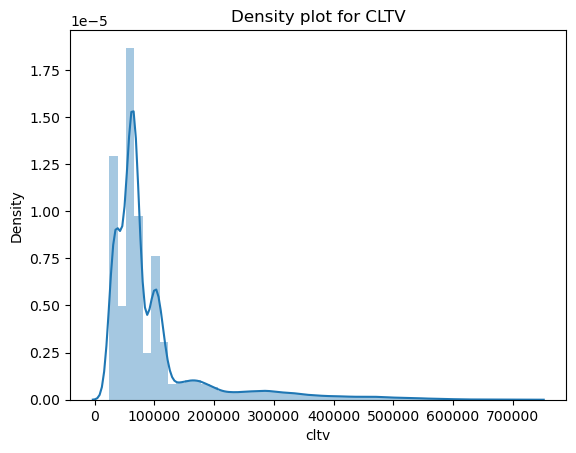

In [15]:
#CLTV is customer lifetime value and more the value of CLTV means better is the customer for VahanBima.
sns.distplot(data['cltv'])
plt.title("Density plot for CLTV")
plt.show()

In [16]:
#We can see the data is right skewed with most density concentrated between [24828,103440]
#So larger density has lower CLTV and few customers have extremely high CLTV.

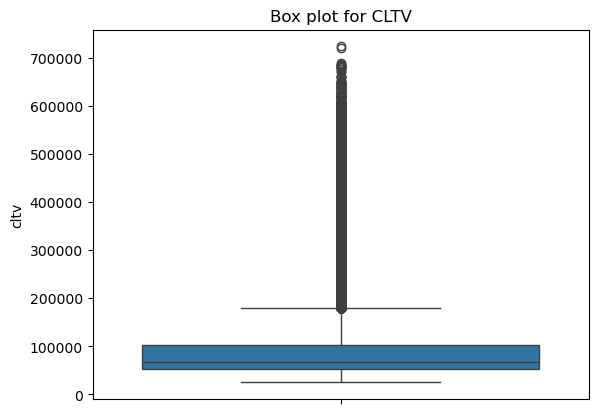

In [17]:
sns.boxplot(data['cltv'])
plt.title('Box plot for CLTV')
plt.show()

In [18]:
#We can clearly see that outliers are present in it.

<H2>EDA: Bivariate Analysis</H2>

<H3>Analysis of Categorical Independent variables</H3>

C:\Users\91888\AppData\Local\Temp\ipykernel_18272\777940442.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, y='cltv', palette='Set2', ax=a[i])
C:\Users\91888\AppData\Local\Temp\ipykernel_18272\777940442.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, y='cltv', palette='Set2', ax=a[i])
C:\Users\91888\AppData\Local\Temp\ipykernel_18272\777940442.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, y='cltv', palette='Set2', ax=a[i])
C:\Users\91888\AppData\Local\Temp\ipykernel_18272\77

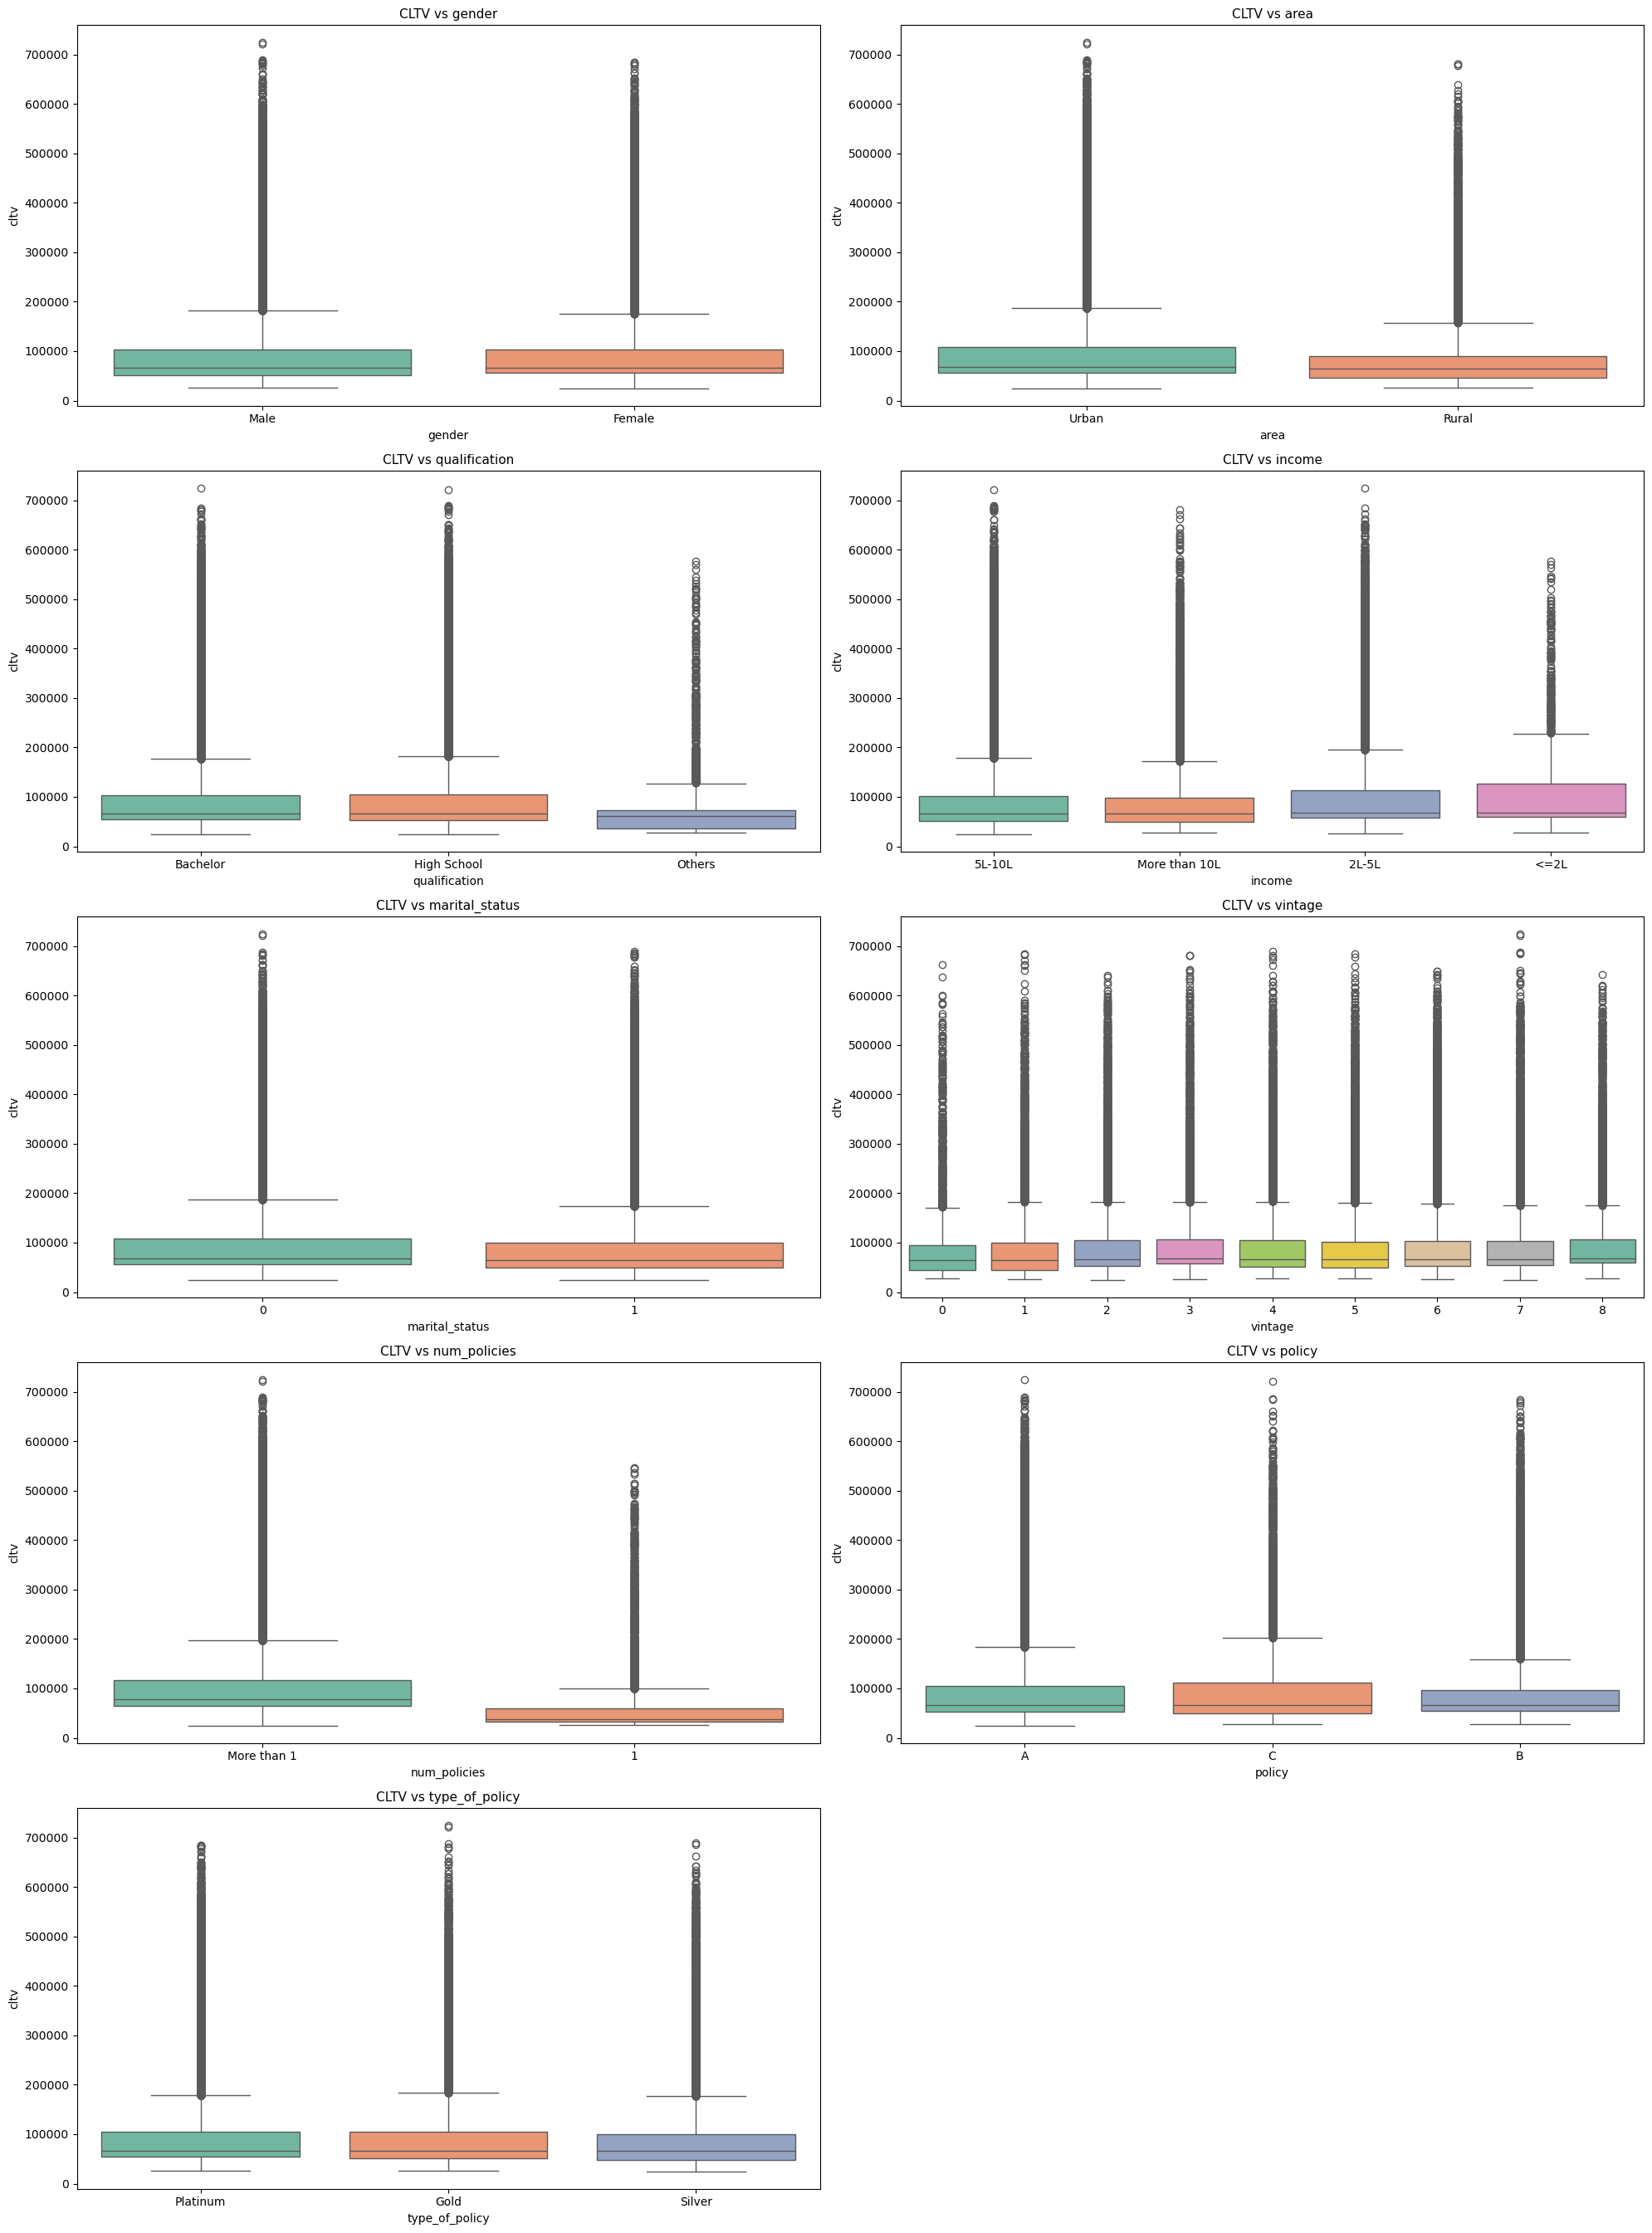

In [19]:
cols = ['gender', 'area', 'qualification', 'income','marital_status', 'vintage', 'num_policies', 'policy', 'type_of_policy']

fig, a = plt.subplots(nrows=5, ncols=2, figsize=(20, 27))
a = a.flatten()
for i, col in enumerate(cols):
    sns.boxplot(data=data, x=col, y='cltv', palette='Set2', ax=a[i])
    a[i].set_title(f'CLTV vs {col}', fontsize=11)

for j in range(i+1, len(a)):
    fig.delaxes(a[j])

plt.tight_layout()
plt.show()

In [20]:
#Insights from Bivariate analysis are as follows:
#1.Gender: Gender wise cltv is similar for both i.e. male and female.
#2.Area: Urban customers is having slightly higher median as compared to the rural.
#3.qualification: Higher school qualifications shows loosely association with higher CLTV.
#4.income: CLTV increases as income increases.
#5.marital_status: non married customers are having more outliners.
#6.vintage: Customers associates longer show slightly higher CLTV.
#7.num_policies:Customers with high no. of policies clearly show higher CLTV.
#8.policy: Policy A has the widest spread and highest outliers for CLTV.
#9.type_of_policy: Gold is showing high CLTV outliners.


In [22]:
data['claim_amount'].describe()

count    89392.000000
mean      4351.502416
std       3262.359775
min          0.000000
25%       2406.000000
50%       4089.000000
75%       6094.000000
max      31894.000000
Name: claim_amount, dtype: float64

In [23]:
#Claim amount column have outlier as lots of the entries are 0(claimed nothing). 

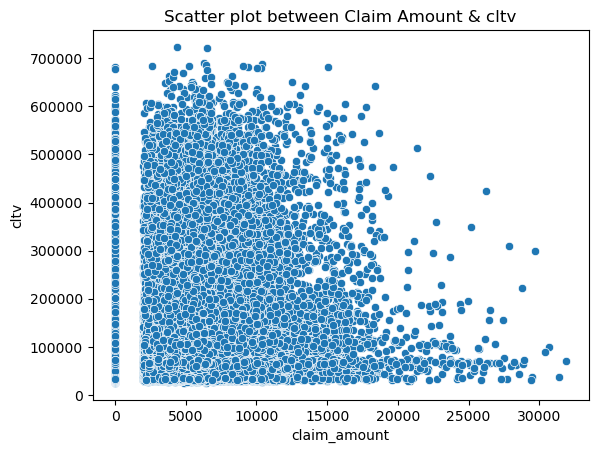

In [24]:
plt.title("Scatter plot between Claim Amount & cltv")
sns.scatterplot(x='claim_amount',y='cltv',data=data)
plt.show()

In [25]:
#Many outliners are present at 0.
#higher claim amounts is correlating with higher CLTV.

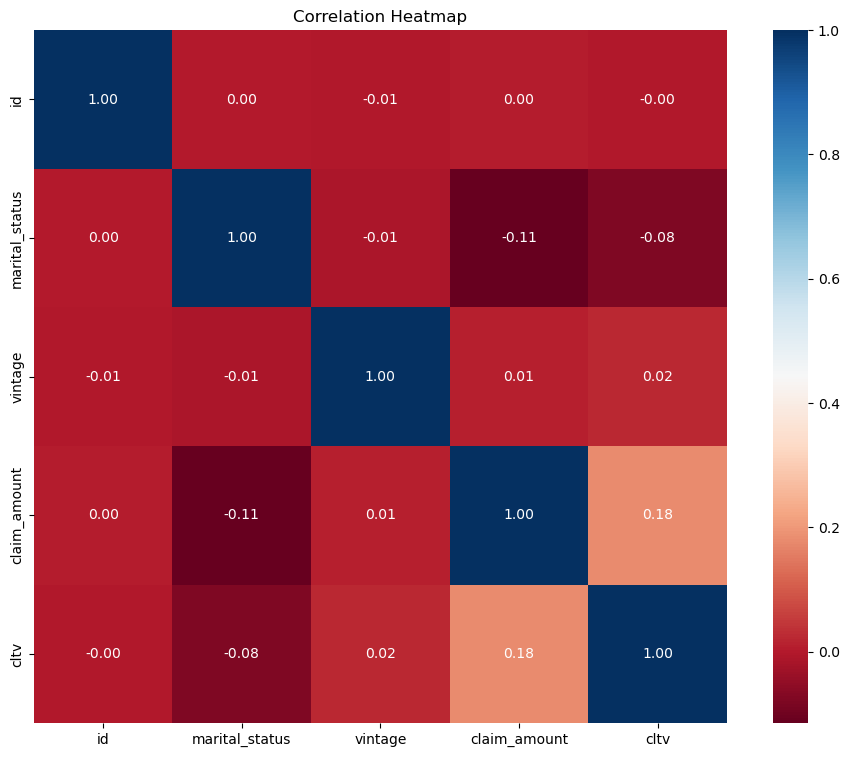

In [13]:
correlation_mat = data.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_mat, annot=True, cmap='RdBu', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# we can see that cltv is having positive correlation with num_policies, income, and claim_amount.

<H2>Feature Engineering</H2>

In [6]:
def per_year(num,den):    
    year=[]
    for i in range(len(num)):
            z = num[i] / den[i]
            year.append(z)  
    return year

In [7]:
#Creating new feature for claim amount per year.
data['claim_amount_per_year'] = per_year(data.claim_amount,data.vintage+1)

In [8]:
test['claim_amount_per_year'] = per_year(test.claim_amount,test.vintage+1)

In [9]:
data['claim_amount_per_year'].max()

28190.0

In [10]:
# Now converting claim amount column to catagorical column of 4 bins.

In [11]:
bins_4 =[-1,6000,12000,18000,24000]
data["claim_amount_per_year_cat"] = pd.cut(data.claim_amount_per_year, bins=bins_4, labels=['1','2','3','4'])

In [12]:
data.claim_amount_per_year.value_counts()

claim_amount_per_year
0.000000       17671
506.000000        19
514.000000        19
520.000000        18
703.000000        18
               ...  
856.666667         1
2172.800000        1
1074.777778        1
729.200000         1
627.600000         1
Name: count, Length: 32246, dtype: int64

In [13]:
data.head(7)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,claim_amount_per_year,claim_amount_per_year_cat
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308,965.000000,1
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400,564.444444,1
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212,288.777778,1
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920,0.000000,1
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736,501.142857,1
5,6,Male,Rural,High School,More than 10L,1,1,0,1,C,Gold,348768,0.000000,1
6,7,Female,Rural,Bachelor,5L-10L,1,6,0,More than 1,A,Gold,238920,0.000000,1


In [14]:
test["claim_amount_per_year_cat"] = pd.cut(test.claim_amount_per_year, bins=bins_4, labels=['1','2','3','4'])

In [15]:
# Encoding Categorical Data
train = data.copy()
train = pd.get_dummies(train, drop_first=True, dtype=int)

In [16]:
train.drop('id', axis=1, inplace=True)
train.head(7)

,marital_status,vintage,claim_amount,cltv,claim_amount_per_year,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver,claim_amount_per_year_cat_2,claim_amount_per_year_cat_3,claim_amount_per_year_cat_4
0,1,5,5790,64308,965.000000,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0
1,0,8,5080,515400,564.444444,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0
2,1,8,2599,64212,288.777778,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0
3,0,7,0,97920,0.000000,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0
4,1,6,3508,59736,501.142857,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0
5,1,1,0,348768,0.000000,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0
6,1,6,0,238920,0.000000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [26]:
#Let's split the dataset into two parts i.e. train and test.

In [17]:
# Creating the feature matrix by removing the target variable(CLTV)
X = train.drop('cltv', axis=1)
X.head(7)

,marital_status,vintage,claim_amount,claim_amount_per_year,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver,claim_amount_per_year_cat_2,claim_amount_per_year_cat_3,claim_amount_per_year_cat_4
0,1,5,5790,965.000000,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0
1,0,8,5080,564.444444,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0
2,1,8,2599,288.777778,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0
3,0,7,0,0.000000,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0
4,1,6,3508,501.142857,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0
5,1,1,0,0.000000,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0
6,1,6,0,0.000000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [18]:
# Creating the target vector
y = train['cltv']
y.head()

0     64308
1    515400
2     64212
3     97920
4     59736
Name: cltv, dtype: int64

In [19]:
#encoding test data
test_encoded = test.copy()
test_encoded = pd.get_dummies(test_encoded, drop_first=True, dtype=int)
test_encoded.drop('id', axis=1, inplace=True)


In [30]:
test_encoded.head()

,marital_status,vintage,claim_amount,claim_amount_per_year,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver,claim_amount_per_year_cat_2,claim_amount_per_year_cat_3,claim_amount_per_year_cat_4
0,0,6,2134,304.857143,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0
1,0,4,4102,820.400000,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0
2,1,7,2925,365.625000,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0
3,1,2,0,0.000000,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0
4,0,5,14059,2343.166667,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0


In [20]:
#splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape, test_encoded.shape)

(71513, 19) (17879, 19) (71513,) (17879,) (59595, 19)


In [22]:
# Feature Scaling
numerical_columns = ['vintage', 'claim_amount', 'claim_amount_per_year']
categorical_columns = [col for col in X_train.columns if col not in numerical_columns]
scaler = MinMaxScaler()
scaler.fit(X_train[numerical_columns])

X_train_scaled_num = pd.DataFrame(scaler.transform(X_train[numerical_columns]), columns=numerical_columns, index=X_train.index)
X_val_scaled_num = pd.DataFrame(scaler.transform(X_val[numerical_columns]), columns=numerical_columns, index=X_val.index)
test_data_scaled_num = pd.DataFrame(scaler.transform(test_encoded[numerical_columns]), columns=numerical_columns, index=test_encoded.index)

X_train_cat = X_train[categorical_columns].reset_index(drop=True)
X_val_cat = X_val[categorical_columns].reset_index(drop=True)
test_data_cat = test_encoded[categorical_columns].reset_index(drop=True)

X_train_scaled = pd.concat([X_train_scaled_num.reset_index(drop=True), X_train_cat], axis=1)
X_val_scaled = pd.concat([X_val_scaled_num.reset_index(drop=True), X_val_cat], axis=1)
test_data_scaled = pd.concat([test_data_scaled_num.reset_index(drop=True), test_data_cat], axis=1)


In [34]:
X_train_scaled.head()

,vintage,claim_amount,claim_amount_per_year,marital_status,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver,claim_amount_per_year_cat_2,claim_amount_per_year_cat_3,claim_amount_per_year_cat_4
0,0.750,0.064934,0.012496,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0
1,0.375,0.228099,0.076818,1,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0
2,0.750,0.147865,0.028456,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0
3,0.750,0.000000,0.000000,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0
4,0.625,0.000000,0.000000,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0


In [35]:
test_data_scaled.head()

,vintage,claim_amount,claim_amount_per_year,marital_status,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver,claim_amount_per_year_cat_2,claim_amount_per_year_cat_3,claim_amount_per_year_cat_4
0,0.750,0.066909,0.012876,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0
1,0.500,0.128614,0.034651,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0
2,0.875,0.091710,0.015443,1,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0
3,0.250,0.000000,0.000000,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0
4,0.625,0.440804,0.098968,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0


In [23]:
print(X_train_scaled.shape, X_val_scaled.shape, y_train.shape, y_val.shape,test_data_scaled.shape)

(71513, 19) (17879, 19) (71513,) (17879,) (59595, 19)


<H1>Model Building & Evaluation</H1>

<h3>Linear Regression</h3>

In [138]:
linearmodel = LinearRegression()

In [139]:
Linear_model = cross_val_score(estimator=linearmodel, X=X_train_scaled, y=y_train, cv=5, scoring='r2')

In [140]:
print(Linear_model)

[0.15065391 0.15252487 0.14919878 0.15573572 0.15065386]


In [141]:
linearmodel.fit(X_train_scaled,y_train)

LinearRegression()

In [142]:
train_prediction = linearmodel.predict(X_train_scaled)
r2_score(y_train, train_prediction)

0.15241718890977307

In [143]:
val_prediction = linearmodel.predict(X_val_scaled)

In [144]:
r2_score(y_val, val_prediction)

0.15143248634056738

In [145]:
prediction_of_linear_regression = linearmodel.predict(test_data_scaled)

In [146]:
submission = pd.DataFrame({
    'id': test['id'],
    'cltv': prediction_of_linear_regression
})
submission.to_csv('Gaurav_Yadav_linear_regression_model.csv', index=False)

<h3>Decision Tree Regression</h3>

In [77]:
dtr = DecisionTreeRegressor(max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=7, random_state=0)

In [78]:
dtr_r2_score = cross_val_score(estimator = dtr, X=X_train_scaled, y=y_train, cv=5, scoring='r2')

In [79]:
print(dtr_r2_score)

[0.15470514 0.15497313 0.15473988 0.16040325 0.15092581]


In [80]:
dtr.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=7, random_state=0)

In [81]:
train_prediction1 = dtr.predict(X_train_scaled)

In [82]:
r2_score(y_train, train_prediction1)

0.15873206476447588

In [83]:
val_prediction1 = dtr.predict(X_val_scaled)

In [84]:
r2_score(y_val, val_prediction1)

0.15604228770122242

In [85]:
prediction_decision_tree_regressor = dtr.predict(test_data_scaled)

In [86]:
submission = pd.DataFrame({
    'id': test['id'],
    'cltv': prediction_decision_tree_regressor
})
submission.to_csv('Gaurav_Yadav_decision_tree_regressor.csv', index=False)

In [ ]:
# Hyperparameter Tuning of Decision Tree Regression

In [ ]:
"""param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
grid_search = GridSearchCV(
    estimator=dtr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)
start_time = time.time()
grid_search.fit(X_train, y_train)
print(f"GridSearchCV took {(time.time() - start_time):.2f} seconds.")

# Best estimator and parameters
best_tree = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)"""

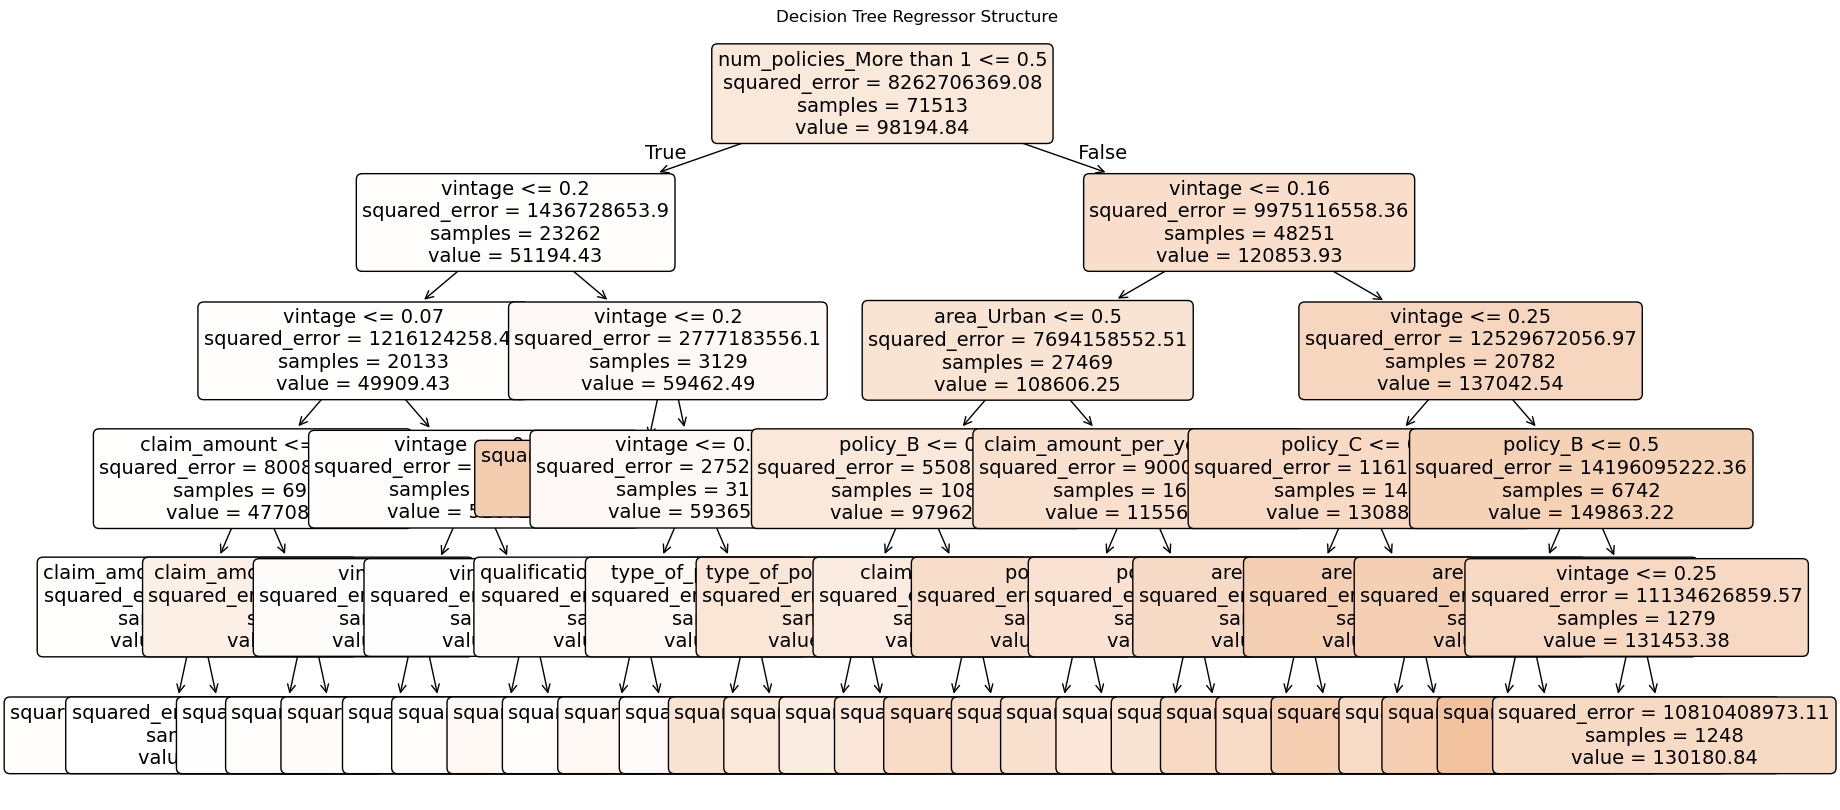

In [87]:
#plotting Decision tree
plt.figure(figsize=(20, 10))
plot_tree(dtr, feature_names=X.columns, filled=True, rounded=True, fontsize=14,impurity=True, precision=2)
plt.title("Decision Tree Regressor Structure")
plt.show()

<h3>Random Forest Regressor</h3>

In [102]:
rfr = RandomForestRegressor(n_estimators=400, max_depth=10, max_features='log2',  random_state=0, n_jobs=-1)

In [103]:
rfr_r2_scores = cross_val_score(estimator=random_forest_regressor, X=X_train_scaled, y=y_train, cv=5, scoring='r2')

In [92]:
print(rfr_r2_scores)

[0.15741087 0.15881265 0.15613777 0.16282292 0.15500795]


In [104]:
rfr.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=400,
                      n_jobs=-1, random_state=0)

In [105]:
train_prediction2 = rfr.predict(X_train_scaled)

In [106]:
r2_score(y_train, train_prediction2)

0.1963416649626626

In [107]:
val_prediction2 = rfr.predict(X_val_scaled)

In [108]:
r2_score(y_val, val_prediction2)

0.15809247101502744

In [109]:
prediction_random_forest_regressor = rfr.predict(test_data_scaled)

In [110]:
submission = pd.DataFrame({
    'id': test['id'],
    'cltv': prediction_random_forest_regressor
})
submission.to_csv('Gaurav_Yadav_random_forest_regressor.csv', index=False)

In [ ]:
# Hyperparameter Tuning of Random Forest Regressor

In [ ]:
"""param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

rfr = RandomForestRegressor(random_state=0, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_dist,
    n_iter=25,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=0
)

random_search.fit(X_train_scaled, y_train)

best_rf = random_search.best_estimator_
val_pred = best_rf.predict(X_val_scaled)
print("Validation R² Score:", r2_score(y_val, val_pred))"""

<h3>Cat Boost Regressor</h3>

In [24]:
catbr = CatBoostRegressor(
    iterations=800,
    learning_rate=0.01,
    depth=8,
    loss_function='RMSE',
    eval_metric='R2',
    early_stopping_rounds=50,
    verbose=100,
    l2_leaf_reg= 7,
    random_seed=0
)

In [25]:
catbr_r2_score = cross_val_score(catbr, X_train_scaled, y_train, cv=5, scoring='r2')

0:	learn: 0.0030464	total: 179ms	remaining: 2m 22s
100:	learn: 0.1382204	total: 2.32s	remaining: 16s
200:	learn: 0.1607905	total: 5.08s	remaining: 15.2s
300:	learn: 0.1671937	total: 8.22s	remaining: 13.6s
400:	learn: 0.1708180	total: 11.6s	remaining: 11.5s
500:	learn: 0.1738185	total: 15.1s	remaining: 8.98s
600:	learn: 0.1763959	total: 18.3s	remaining: 6.07s
700:	learn: 0.1787557	total: 21.5s	remaining: 3.04s
799:	learn: 0.1810293	total: 24.7s	remaining: 0us
0:	learn: 0.0030571	total: 21.9ms	remaining: 17.5s
100:	learn: 0.1380279	total: 3.17s	remaining: 21.9s
200:	learn: 0.1608157	total: 6.18s	remaining: 18.4s
300:	learn: 0.1669397	total: 9.11s	remaining: 15.1s
400:	learn: 0.1705553	total: 12.3s	remaining: 12.3s
500:	learn: 0.1734269	total: 15.4s	remaining: 9.21s
600:	learn: 0.1760216	total: 18.5s	remaining: 6.11s
700:	learn: 0.1784579	total: 21.4s	remaining: 3.02s
799:	learn: 0.1808378	total: 24.4s	remaining: 0us
0:	learn: 0.0030619	total: 17.9ms	remaining: 14.3s
100:	learn: 0.1382452

In [26]:
print(catbr_r2_score)

[0.15830545 0.16009316 0.15823781 0.16545064 0.15675836]


In [27]:
catbr.fit(X_train_scaled, y_train, eval_set=(X_val_scaled, y_val))

0:	learn: 0.0030665	test: 0.0029058	best: 0.0029058 (0)	total: 24ms	remaining: 19.2s
100:	learn: 0.1380849	test: 0.1368899	best: 0.1368899 (100)	total: 2.94s	remaining: 20.3s
200:	learn: 0.1601838	test: 0.1561505	best: 0.1561505 (200)	total: 6.51s	remaining: 19.4s
300:	learn: 0.1658368	test: 0.1592278	best: 0.1592278 (300)	total: 10.2s	remaining: 16.8s
400:	learn: 0.1689076	test: 0.1597767	best: 0.1597802 (391)	total: 13.9s	remaining: 13.8s
500:	learn: 0.1713845	test: 0.1597879	best: 0.1598069 (493)	total: 17.4s	remaining: 10.4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1598068998
bestIteration = 493

Shrink model to first 494 iterations.


In [28]:
train_prediction3 = catbr.predict(X_train_scaled)

In [29]:
r2_score(y_train, train_prediction3)

0.1712492039881891

In [30]:
val_prediction3 = catbr.predict(X_val_scaled)

In [31]:
r2_score(y_val, val_prediction3)

0.15980689982752205

In [32]:
prediction_cat_boost_regressor = catbr.predict(test_data_scaled)

In [33]:
submission = pd.DataFrame({
    'id': test['id'],
    'cltv': prediction_cat_boost_regressor
})
submission.to_csv('Gaurav_Yadav_cat_boost_regressor.csv', index=False)

In [ ]:
# Hyperparameter Tuning of Cat Boost Regressor

In [ ]:
"""catbr_model = CatBoostRegressor(
    loss_function='RMSE', 
    eval_metric='R2', 
    verbose=0, 
    random_seed=42
)

cb_params = {
    'iterations': [400, 600, 800],
    'learning_rate': [0.02, 0.01, 0.05],
    'depth': [5, 6 , 7 , 8 , 9],
    'l2_leaf_reg': [2, 4, 7]
}
cb_search = RandomizedSearchCV(
    estimator=cb_model,
    param_distributions=cb_params,
    n_iter=15,
    cv=4,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42)

cb_search.fit(X_train_scaled, y_train)
optimized_cb = cb_search.best_estimator_
cb_val_preds = optimized_cb.predict(X_val_scaled)
print("Optimized CatBoost R² Score on Validation Set:", r2_score(y_val, cb_val_preds))
print("Best Hyperparameters Found:", cb_search.best_params_)"""


<h3>Gradient Boost regressor</h3>

In [111]:
gbr = GradientBoostingRegressor(n_estimators=200, 
                                subsample=0.8, 
                                min_samples_split = 5, 
                                min_samples_leaf=1, 
                                max_features='sqrt', 
                                max_depth=3, 
                                learning_rate=0.05 , 
                                random_state=0)

In [112]:
gbr_r2_score = cross_val_score(estimator=gbr, X=X_train_scaled, y=y_train, cv=5, scoring='r2')

In [113]:
print(gbr_r2_score)

[0.15972386 0.16041276 0.15793904 0.16469956 0.15758333]


In [114]:
gbr.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_features='sqrt',
                          min_samples_split=5, n_estimators=200, random_state=0,
                          subsample=0.8)

In [115]:
train_prediction4 = gbr.predict(X_train_scaled)

In [116]:
r2_score(y_train, train_prediction4)

0.16472759266295578

In [117]:
val_prediction4 = gbr.predict(X_val_scaled)

In [118]:
r2_score(y_val, val_prediction4)

0.15914054200891403

In [119]:
prediction_gradient_boost_regressor = gbr.predict(test_data_scaled)

In [120]:
submission = pd.DataFrame({
    'id': test['id'],
    'cltv': prediction_gradient_boost_regressor
})
submission.to_csv('Gaurav_Yadav_gradient_boost_regressor.csv', index=False)

In [ ]:
# Hyperparameter Tuning of Gradient Boost Regressor

In [ ]:
"""param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 6],
    'min_samples_split': [2, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.7, 0.85, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

gbr = GradientBoostingRegressor(random_state=0)

gbr_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=0
)

gbr_search.fit(X_train_scaled, y_train)

best_gbr = gbr_search.best_estimator_
val_pred_best_gbr = best_gbr.predict(X_val_scaled)

print("Tuned GBR Validation R2 Score:", r2_score(y_val, val_pred_best_gbr))
print("Best Parameters:", gbr_search.best_params_)"""

<h3>XGBRegressor</h3>

In [125]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, subsample=0.8, colsample_bytree=0.7, random_state=42)

In [127]:
X_train_scaled.columns = X_train_scaled.columns.str.replace(r"[<>[\]()]","", regex=True)
X_val_scaled.columns = X_val_scaled.columns.str.replace(r"[<>[\]()]","", regex=True)
test_data_scaled.columns = test_data_scaled.columns.str.replace(r"[<>[\]()]","", regex=True)

In [128]:
xgb_r2_score = cross_val_score(estimator=xgb, X=X_train_scaled, y=y_train, cv=5, scoring='r2')

In [129]:
print(xgb_r2_score)

[0.15966403 0.15988451 0.15808576 0.16406071 0.15715253]


In [130]:
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [131]:
train_prediction5 = xgb.predict(X_train_scaled)

In [132]:
r2_score(y_train, train_prediction5)

0.16240453720092773

In [133]:
val_prediction5 = xgb.predict(X_val_scaled)

In [134]:
r2_score(y_val, val_prediction5)

0.1593213677406311

In [135]:
prediction_xgboost = xgb.predict(test_data_scaled)

In [136]:
submission = pd.DataFrame({
    'id': test['id'],
    'cltv': prediction_xgboost
})
submission.to_csv('Gaurav_Yadav_xgboost.csv', index=False)

In [ ]:
# Hyperparameter Tuning of XGB Regressor

In [ ]:
"""xgb_model = XGBRegressor(random_state=0, n_jobs=-1, verbosity=0)

xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=30,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=0
)

xgb_random.fit(X_train_scaled, y_train)

xgb_best_model = xgb_random.best_estimator_
val_preds = xgb_best_model.predict(X_val_scaled)

print("Validation R2 Score:", r2_score(y_val, val_preds))
print("Best XGBoost Parameters:", xgb_random.best_params_)"""


<h2>Final Model Selection: CatBoost Regressor</h2>

In [ ]:
#After evaluating multiple machine learning models, I have selected CatBoost Regressor as the final model for this project.
#CatBoost delivered the best R2 score which indicates its strong ability to make accurate predictions for VahanBima. 